# Load & Info & Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
X = pd.read_csv('../data/Airbnb_xtrain_v4.csv')
y = pd.read_csv('../data/Airbnb_ytrainVersion2.csv')

In [2]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# # Create a count plot
# sns.countplot(y='country_destination', data=y, order=y['country_destination'].value_counts().index)

# plt.title("Distribution of Country Destinations", size=13)
# plt.xlabel("Number of Users")
# plt.ylabel("Country Destination")
# plt.grid(axis='x')  # Add grid lines to the x-axis for better readability

# # Calculate and display the percentage labels on each bar
# total = len(y)
# for p in plt.gca().patches:
#     percentage = '{:.1f}%'.format(100 * p.get_width() / total)
#     x = p.get_x() + p.get_width() + 0.02  # Adjust the position of the label
#     y = p.get_y() + p.get_height() / 2
#     plt.annotate(percentage, (x, y))

# plt.show()

In [3]:
#Checking null values
X.isnull().sum()

Unnamed: 0      0
c_417           0
c_440           0
c_413           0
age_NAN         0
               ..
c_188           0
gender_OTHER    0
language_ja     0
c_62            0
c_75            0
Length: 301, dtype: int64

In [4]:
X = X.dropna()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(29525, 301)

In [6]:
print(X_train.dtypes)

Unnamed: 0        int64
c_417           float64
c_440           float64
c_413           float64
age_NAN           int64
                 ...   
c_188           float64
gender_OTHER      int64
language_ja       int64
c_62            float64
c_75            float64
Length: 301, dtype: object


In [7]:
print(y_train.dtypes)

country_destination    object
dtype: object


# selector1

In [8]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k=100)
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [9]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

## selector2

We need to convert "country_destination" to int

In [10]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [53]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k=5)
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['Unnamed: 0', 'tfa_month', 'c_79', 'tfa_season_0', 'c_134'], dtype='object')


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Selected

In [54]:
selected_feature_names

Index(['Unnamed: 0', 'tfa_month', 'c_79', 'tfa_season_0', 'c_134'], dtype='object')

In [55]:
X = X[selected_feature_names]

In [56]:
# sns.heatmap(X.corr(), annot= True)

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(29525, 5)

# Fiting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Accuracy

In [52]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:}") 

Accuracy: 0.6113124470787469


### Compare
0.6113124470787469 : all

0.6113124470787469 : 300
 
0.6113124470787469 : 100
 
0.6089548194811353 : 50
 
0.6089886879360563 : 25

0.6089886879360563 : 10

0.6090225563909775 : 5

# Predict

In [18]:
X.head()

,Unnamed: 0,c_417,c_440,c_413,age_NAN,c_416,c_438,tfa_day,c_439,c_226,...,c_103,c_126,c_137,c_167,c_170,c_188,gender_OTHER,language_ja,c_62,c_75
0,137021,10.120,6.855,6.785,0,13.470,10.20,1,11.140,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,137022,9.766,8.310,0.000,1,11.664,10.05,1,10.484,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,137023,11.100,11.016,13.336,1,0.000,11.17,1,11.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,137024,10.550,7.360,0.000,1,14.555,10.12,1,11.336,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,137025,0.000,5.280,0.000,1,0.000,5.77,1,5.723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [19]:
y

,country_destination
0,other
1,NDF
2,NDF
3,NDF
4,GB
...,...
73807,US
73808,NDF
73809,US
73810,NDF


In [20]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Visualize

In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[    0     0     0     0     0     0     0    67     0     0     0     0]
 [    0     0     0     0     0     0     0   159     0     0     0     0]
 [    0     0     0     0     0     0     0    95     0     0     0     0]
 [    0     0     0     0     0     0     0   262     0     0     0     0]
 [    0     0     0     0     0     0     0   590     0     0     0     0]
 [    0     0     0     0     0     0     0   289     0     0     0     0]
 [    0     0     0     0     0     0     0   423     0     0     0     0]
 [    0     0     0     0     0     0     0 18049     0     0     0     0]
 [    0     0     0     0     0     0     0    89     0     0     0     0]
 [    0     0     0     0     0     0     0    41     0     0     0     0]
 [    0     0     0     0     0     0     0  8053     0     0     0     0]
 [    0     0     0     0     0     0     0  1408     0     0     0     0]]


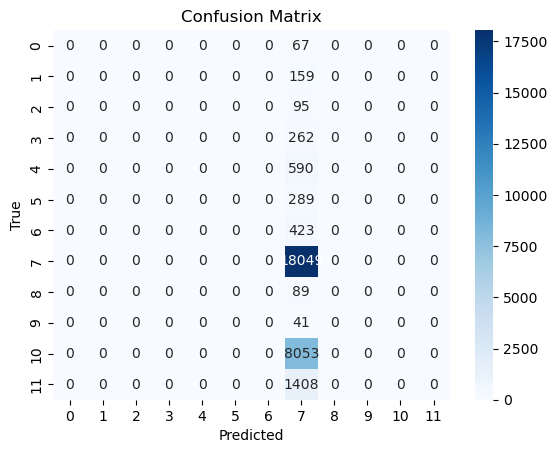

In [22]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Submission

### data

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/Airbnb_xtest_v4.csv")

# Cleaning
test_data = test_data[selected_feature_names]

In [24]:
test_data[selected_feature_names]

,Unnamed: 0,c_417,c_440,c_413,age_NAN,c_416,c_438,tfa_day,c_439,c_226,...,c_103,c_126,c_137,c_167,c_170,c_188,gender_OTHER,language_ja,c_62,c_75
0,213451,7.000,7.610,0.000,0,11.360,9.610,1,9.984,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,213452,9.620,8.080,0.000,1,11.984,9.484,1,9.810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,213453,8.586,9.060,0.000,1,13.266,9.730,1,10.510,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,213454,11.580,5.445,0.000,1,6.996,9.320,1,10.320,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,213455,7.434,7.023,10.600,1,12.680,10.080,1,10.890,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,275542,11.550,8.770,13.020,0,14.260,10.210,30,11.980,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0
62092,275543,0.000,6.594,2.197,1,0.000,7.855,30,8.230,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
62093,275544,11.430,7.760,10.660,1,12.070,9.266,30,10.320,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
62094,275545,7.630,6.990,10.310,1,12.445,10.060,30,11.040,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [25]:
#Checking null values
test_data.isnull().sum()

Unnamed: 0        0
c_417           428
c_440           428
c_413           428
age_NAN           0
               ... 
c_188           428
gender_OTHER      0
language_ja       0
c_62            428
c_75            428
Length: 301, dtype: int64

In [26]:
test_data = test_data.dropna()

In [27]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data[selected_feature_names])

In [28]:
y['country_destination'] = y['country_destination'].astype('category')

# # Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=y['country_destination'].cat.categories)

In [29]:
test_data

,Unnamed: 0,c_417,c_440,c_413,age_NAN,c_416,c_438,tfa_day,c_439,c_226,...,c_126,c_137,c_167,c_170,c_188,gender_OTHER,language_ja,c_62,c_75,predicted_country
0,213451,7.000,7.610,0.000,0,11.360,9.610,1,9.984,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
1,213452,9.620,8.080,0.000,1,11.984,9.484,1,9.810,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
2,213453,8.586,9.060,0.000,1,13.266,9.730,1,10.510,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
3,213454,11.580,5.445,0.000,1,6.996,9.320,1,10.320,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
4,213455,7.434,7.023,10.600,1,12.680,10.080,1,10.890,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,275542,11.550,8.770,13.020,0,14.260,10.210,30,11.980,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,NDF
62092,275543,0.000,6.594,2.197,1,0.000,7.855,30,8.230,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
62093,275544,11.430,7.760,10.660,1,12.070,9.266,30,10.320,3.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF
62094,275545,7.630,6.990,10.310,1,12.445,10.060,30,11.040,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,NDF


In [30]:
test_data['predicted_country'].unique()

['NDF']
Categories (12, object): ['AU', 'CA', 'DE', 'ES', ..., 'NL', 'PT', 'US', 'other']

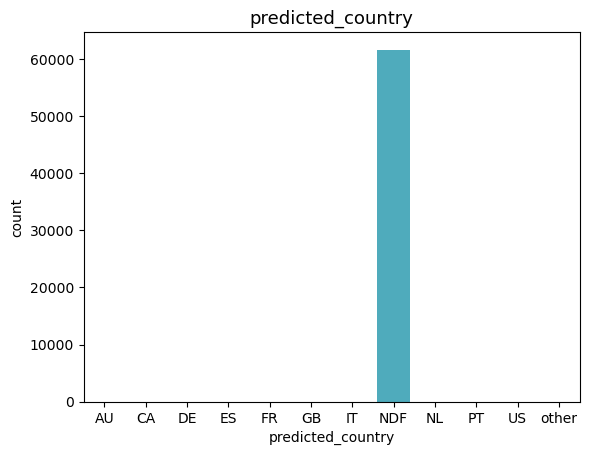

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_country', data=test_data)
plt.title("predicted_country", size=13);

In [32]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)